# Generating a "roadmap" using Wave Function Collapse

In this notebook, it is demonstrated how a simple map of road tiles can be generated using the WFC algorithm

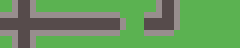

In [1]:
using Images
# First, load the tiles into a spriteset

spriteset = load("resources/paths.png")

,,,,,,,,,,,

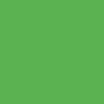
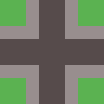
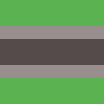
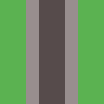
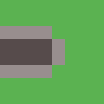
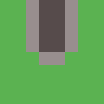
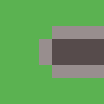
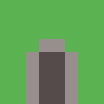
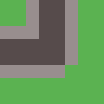
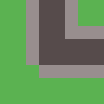
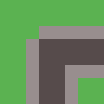
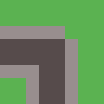

In [2]:
# create rotations of the spriteset and store in a Dict
all_sprites = Dict(
    1 => spriteset[:, 33:40], # empty
    2 => spriteset[:, 1:8], # crossing
    3 => spriteset[:, 9:16], # horizontal
    4 => transpose(spriteset[:, 9:16]), # vertical
    5 => spriteset[:, 17:24], # ending to left
    6 => rotr90(spriteset[:, 17:24]), # ending up
    7 => rot180(spriteset[:, 17:24]), # ending to right
    8 => rotl90(spriteset[:, 17:24]), # ending down
    9 => spriteset[:, 25:32], # two-way left up
    10 => rotr90(spriteset[:, 25:32]), # two-way up right
    11 => rot180(spriteset[:, 25:32]), # two-way right down
    12 => rotl90(spriteset[:, 25:32]), # two-way down left
    
)
# visualize them
[all_sprites[key] for key in range(1, 12)]

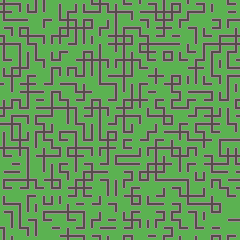

In [95]:
include("wfc.jl")

# Create an "Environment" class that the Solution uses to arrive at a valid solution
struct TileMap
    map::Matrix{Int8}
    tiles::Dict
    TileMap(W::Int, H::Int, tiles::Dict) = new(zeros(H, W), tiles)
end

WIDTH = 30 # map width in tiles
HEIGHT = 30 # map height in tiles

# Define a validation function that checks if a solution is valid
function check_valid(solution::Solution, x::Int, i::CartesianIndex)
    
    valid::Bool = true
    # first and foremost, if x is already the selected tile at index i, it is valid
    if solution.environment.map[i] == x
        return true
    elseif solution.environment.map[i] != 0 # otherwise, if our choice does not match the selected tile, it is invalid
        return false
    end
    # if the tiles are compatible (all pixel values match between the sides of the tile and its neighbors), it is valid
    if i[1] > 1 && solution.environment.map[i[1]-1, i[2]] != 0 # check if northern tile is compatible
        tile_north = solution.environment.tiles[solution.environment.map[i[1]-1, i[2]]]
        valid *= all(tile_north[end, :] .== solution.environment.tiles[x][1, :])
    end
    if i[1] < size(solution.environment.map, 1) - 1 && solution.environment.map[i[1]+1, i[2]] != 0 # southern tile
        tile_south = solution.environment.tiles[solution.environment.map[i[1]+1, i[2]]]
        valid *= all(tile_south[1, :] .== solution.environment.tiles[x][end, :])
    end
    if i[2] > 1 && solution.environment.map[i[1], i[2]-1] != 0 # western tile
        tile_west = solution.environment.tiles[solution.environment.map[i[1], i[2]-1]]
        valid *= all(tile_west[:, end] .== solution.environment.tiles[x][:, 1])
    end
    if i[2]  < size(solution.environment.map, 2) - 1 && solution.environment.map[i[1], i[2]+1] != 0 # eastern tile
        tile_east = solution.environment.tiles[solution.environment.map[i[1], i[2]+1]]
        valid *= all(tile_east[:, 1] .== solution.environment.tiles[x][:, end])
    end
    valid
end
# updating function
function update!(sol::Solution, x::Int, i::CartesianIndex)
    sol.environment.map[i] = x
end

# function to parse map
function parse_map(map::Matrix{Int8}, tiles::Dict)::Matrix{RGBA{N0f8}}
    tile_width = size(tiles[1], 2)
    tile_height = size(tiles[1], 1)
    width = size(map, 2)*tile_width
    height = size(map, 1)*tile_height
    tile_map::Matrix{RGBA{N0f8}} = zeros(RGBA{N0f8}, height, width)
    for i in CartesianIndices(map)
        start_row = 1 + (i[1]-1)*tile_height
        end_row = start_row + tile_height - 1
        start_col = 1 + (i[2]-1)*tile_width
        end_col = start_col + tile_width - 1
        if !(map[i] in keys(tiles)) # fill with black
            tile_map[start_row : end_row, start_col : end_col] = zeros(RGBA{N0f8}, tile_height, tile_width)
        else
            tile_map[start_row : end_row, start_col : end_col] = tiles[map[i]]
        end
    end
    tile_map
end

# Save each iteration of the algorithm for visualization
map_history = Vector{Matrix{Int8}}()
function callback!(sol::Solution, map_history::Vector{Matrix{Int8}})
    push!(map_history, copy(solution.environment.map))
end

# Create an instance of a solution
solution = Solution{TileMap}(length(all_sprites), (WIDTH, HEIGHT), TileMap(WIDTH, HEIGHT, all_sprites))

# Solve it
_, finished = solve_wfc!(solution, update!, check_valid, (solution) -> callback!(solution, map_history));
# Show the resulting map
parse_map(solution.environment.map, solution.environment.tiles)

In [101]:
# Create an animation of the algorithm's iterations
using Plots
animation = @animate for i ∈ 1:size(map_history, 1)
    plot(parse_map(map_history[i], solution.environment.tiles))
end;

┌ Info: Saved animation to 
│   fn = z:\prog\simulation\wfc_tiles_solution.gif
└ @ Plots C:\Users\cerik\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("z:\\prog\\simulation\\wfc_tiles_solution.gif")
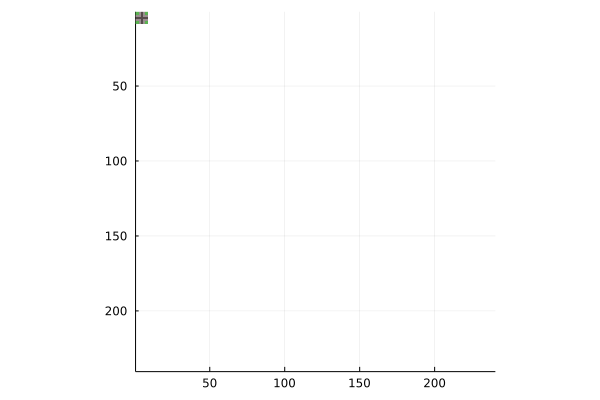

In [102]:
gif(animation, "wfc_tiles_solution.gif", fps=50)